In [ ]:
import numpy as np
import pandas as pd
import torch
import os

In [2]:
dataset_list = [
                'IRDS_clf_bn_EFL', 'IRDS_clf_bn_EFR', 'IRDS_clf_bn_SAL', 
                'IRDS_clf_bn_SAR', 
                'IRDS_clf_bn_SFE', 'IRDS_clf_bn_SFL', 'IRDS_clf_bn_SFR', 
                'IRDS_clf_bn_STL', 'IRDS_clf_bn_STR', 
                'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK', 
                # 'KERAAL_clf_mc_CTK', 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK
                'KIMORE_clf_bn_LA', 'KIMORE_clf_bn_LT', 'KIMORE_clf_bn_PR', 'KIMORE_clf_bn_Sq', 'KIMORE_clf_bn_TR', 
                # 'KINECAL_clf_bn_3WFV', 'KINECAL_clf_bn_GGFV', 'KINECAL_clf_bn_QSEC', 'KINECAL_clf_bn_QSEO', #'SPHERE_clf_bn_WUS',                     
                'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing',                    
                'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
                'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS'
                
                ]

In [3]:
data_path = '/home/jabdullayev/phd/datasets/classification/'
for dataset in dataset_list:
    dataset_path = os.path.join(data_path, dataset, "fold0")

    xtrain = np.load(os.path.join(dataset_path, "x_train_fold0.npy"), allow_pickle=True,)
    ytrain = np.load(os.path.join(dataset_path, "y_train_fold0.npy"), allow_pickle=True)
    strain = np.load(os.path.join(dataset_path, "s_train_fold0.npy"), allow_pickle=True)
    
    xtest = np.load(os.path.join(dataset_path, "x_test_fold0.npy"), allow_pickle=True,)
    ytest = np.load(os.path.join(dataset_path, "y_test_fold0.npy"), allow_pickle=True)
    stest = np.load(os.path.join(dataset_path, "s_test_fold0.npy"), allow_pickle=True)

    # print(f'x_train shape: {xtrain.shape}')
    # print(f'y_train shape: {ytrain.shape}')
    # print(f's_train shape: {strain.shape}')
    # print('------------------------------')
    # print(f'x_test shape: {xtest.shape}')
    # print(f'y_test shape: {ytest.shape}')
    # print(f's_test shape: {stest.shape}')


    # if xtrain.shape[0] != strain.shape[0]:
    #     print(f"Dataset: {dataset}")
    #     print(f'x_train shape: {xtrain.shape}')
    #     print(f'y_train shape: {ytrain.shape}')
    #     print(f's_train shape: {strain.shape}')
    #     print('------------------------------')
    #     print(f'x_test shape: {xtest.shape}')
    #     print(f'y_test shape: {ytest.shape}')
    #     print(f's_test shape: {stest.shape}')

    #     print('\n\n')
    # break


In [34]:
dataset_list = [
                'IRDS_clf_bn_EFL', 'IRDS_clf_bn_EFR', 'IRDS_clf_bn_SAL', 
                # 'IRDS_clf_bn_SAR', 
    
                'IRDS_clf_bn_SFE', 'IRDS_clf_bn_SFL', 'IRDS_clf_bn_SFR', 
                'IRDS_clf_bn_STL', 
                'IRDS_clf_bn_STR', 
                'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK', 
                
                # 'KERAAL_clf_mc_CTK', 
                # 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK', 'KIMORE_clf_bn_LA', 'KIMORE_clf_bn_LT', 'KIMORE_clf_bn_PR', 'KIMORE_clf_bn_Sq', 
                # 'KIMORE_clf_bn_TR', 'KINECAL_clf_bn_3WFV', 'KINECAL_clf_bn_GGFV', 'KINECAL_clf_bn_QSEC', 'KINECAL_clf_bn_QSEO', 'SPHERE_clf_bn_WUS', 
                
                # 'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing'
                
                'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
                'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS'                
                ]


data_path = '/home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs/'
new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
df = pd.DataFrame(columns=new_columns)

for dataset in dataset_list:
    columns = ['Unnamed: 0', 'scenario', 'run',	'acc',	'bal_acc', 'f1_score', 'auroc']
    fin_df = pd.DataFrame(columns=columns)
    for i in range (5):
        dataset_path = os.path.join(data_path, dataset, "CoDATS", f"_run_{i}", "results.csv")
        res_df = pd.read_csv(dataset_path)
        fin_df = pd.concat([fin_df, res_df[res_df['scenario']=='mean']], axis=0)

    # new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
    # df = pd.DataFrame(columns=new_columns)
    rows = [dataset]
    mean_acc = fin_df['acc'].mean()
    mean_bal_acc = fin_df['bal_acc'].mean()
    mean_f1_score = fin_df['f1_score'].mean()
    mean_auroc = fin_df['auroc'].mean()
    dataset_list = [
                'IRDS_clf_bn_EFL', 'IRDS_clf_bn_EFR', 'IRDS_clf_bn_SAL', 
                # 'IRDS_clf_bn_SAR', 
    
                'IRDS_clf_bn_SFE', 'IRDS_clf_bn_SFL', 'IRDS_clf_bn_SFR', 
                'IRDS_clf_bn_STL', 
                'IRDS_clf_bn_STR', 
                'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK', 
                
                # 'KERAAL_clf_mc_CTK', 
                # 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK', 'KIMORE_clf_bn_LA', 'KIMORE_clf_bn_LT', 'KIMORE_clf_bn_PR', 'KIMORE_clf_bn_Sq', 
                # 'KIMORE_clf_bn_TR', 'KINECAL_clf_bn_3WFV', 'KINECAL_clf_bn_GGFV', 'KINECAL_clf_bn_QSEC', 'KINECAL_clf_bn_QSEO', 'SPHERE_clf_bn_WUS', 
                
                # 'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing'
                
                'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
                'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS'                
                ]


data_path = '/home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs/'
new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
df = pd.DataFrame(columns=new_columns)

for dataset in dataset_list:
    columns = ['Unnamed: 0', 'scenario', 'run',	'acc',	'bal_acc', 'f1_score', 'auroc']
    fin_df = pd.DataFrame(columns=columns)
    for i in range (5):
        dataset_path = os.path.join(data_path, dataset, "CoDATS", f"_run_{i}", "results.csv")
        res_df = pd.read_csv(dataset_path)
        fin_df = pd.concat([fin_df, res_df[res_df['scenario']=='mean']], axis=0)

    # new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
    # df = pd.DataFrame(columns=new_columns)
    rows = [dataset]
    mean_acc = fin_df['acc'].mean()
    mean_bal_acc = fin_df['bal_acc'].mean()
    mean_f1_score = fin_df['f1_score'].mean()
    mean_auroc = fin_df['auroc'].mean()
    
    rows.append(mean_acc)
    rows.append(mean_bal_acc)
    rows.append(mean_f1_score)
    rows.append(mean_auroc)
    
    print(f"mean_acc: {mean_acc}")
    print(f"mean_bal_acc: {mean_acc}")
    print(f"mean_f1_score: {mean_acc}")
    print(f"mean_auroc: {mean_auroc}")
    
    df = pd.concat([df, pd.DataFrame([rows], columns=new_columns)], axis=0)    

    # break
    rows.append(mean_acc)
    rows.append(mean_bal_acc)
    rows.append(mean_f1_score)
    rows.append(mean_auroc)
    
    print(f"mean_acc: {mean_acc}")
    print(f"mean_bal_acc: {mean_acc}")
    print(f"mean_f1_score: {mean_acc}")
    print(f"mean_auroc: {mean_auroc}")
    
    df = pd.concat([df, pd.DataFrame([rows], columns=new_columns)], axis=0)    

    # break

mean_acc: 0.8833399999999999
mean_bal_acc: 0.8833399999999999
mean_f1_score: 0.8833399999999999
mean_auroc: 0.48888
mean_acc: 0.725
mean_bal_acc: 0.725
mean_f1_score: 0.725
mean_auroc: 0.42916
mean_acc: 0.8777799999999999
mean_bal_acc: 0.8777799999999999
mean_f1_score: 0.8777799999999999
mean_auroc: 0.22946
mean_acc: 0.73334
mean_bal_acc: 0.73334
mean_f1_score: 0.73334
mean_auroc: 0.0
mean_acc: 0.8375199999999999
mean_bal_acc: 0.8375199999999999
mean_f1_score: 0.8375199999999999
mean_auroc: 0.6103
mean_acc: 0.60418
mean_bal_acc: 0.60418
mean_f1_score: 0.60418
mean_auroc: 0.08444
mean_acc: 0.77498
mean_bal_acc: 0.77498
mean_f1_score: 0.77498
mean_auroc: 0.43406
mean_acc: 0.69746
mean_bal_acc: 0.69746
mean_f1_score: 0.69746
mean_auroc: 0.5494
mean_acc: 0.7999799999999999
mean_bal_acc: 0.7999799999999999
mean_f1_score: 0.7999799999999999
mean_auroc: 0.90524
mean_acc: 0.66668
mean_bal_acc: 0.66668
mean_f1_score: 0.66668
mean_auroc: 0.0
mean_acc: 0.7
mean_bal_acc: 0.7
mean_f1_score: 0.7
mea

/tmp/ipykernel_434250/1125151587.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fin_df = pd.concat([fin_df, res_df[res_df['scenario']=='mean']], axis=0)
/tmp/ipykernel_434250/1125151587.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([rows], columns=new_columns)], axis=0)
/tmp/ipykernel_434250/1125151587.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exc

In [32]:
fin_df

,Unnamed: 0,scenario,run,acc,bal_acc,f1_score,auroc
1,1,mean,-,0.8333,0.8333,0.8286,0.9167
1,1,mean,-,0.8333,0.8571,0.8333,0.9643
1,1,mean,-,0.6667,0.6857,0.6667,0.8071
1,1,mean,-,0.8333,0.8333,0.8286,0.9167
1,1,mean,-,0.8333,0.8571,0.8333,0.9214


In [18]:
df

,Dataset,mean_acc,mean_bal_acc,mean_f1_score,mean_auroc
0,IRDS_clf_bn_STR,0.69746,0.64864,0.54486,0.5494


In [14]:
fin_df['bal_acc'].mean()

np.float64(0.86664)

In [35]:
df

,Dataset,mean_acc,mean_bal_acc,mean_f1_score,mean_auroc
0,IRDS_clf_bn_EFL,0.88334,0.86664,0.79428,0.48888
0,IRDS_clf_bn_EFR,0.72500,0.61984,0.53546,0.42916
0,IRDS_clf_bn_SAL,0.87778,0.84112,0.81196,0.22946
0,IRDS_clf_bn_SFE,0.73334,0.73334,0.51490,0.00000
0,IRDS_clf_bn_SFL,0.83752,0.88200,0.79104,0.61030
0,IRDS_clf_bn_SFR,0.60418,0.57110,0.49266,0.08444
0,IRDS_clf_bn_STL,0.77498,0.71862,0.65456,0.43406
0,IRDS_clf_bn_STR,0.69746,0.64864,0.54486,0.54940
0,KERAAL_clf_bn_CTK,0.79998,0.81330,0.79810,0.90524
0,KERAAL_clf_bn_ELK,0.66668,0.66668,0.39940,0.00000


In [36]:
uda_df = df.copy()

In [37]:
uda_df

,Dataset,mean_acc,mean_bal_acc,mean_f1_score,mean_auroc
0,IRDS_clf_bn_EFL,0.88334,0.86664,0.79428,0.48888
0,IRDS_clf_bn_EFR,0.72500,0.61984,0.53546,0.42916
0,IRDS_clf_bn_SAL,0.87778,0.84112,0.81196,0.22946
0,IRDS_clf_bn_SFE,0.73334,0.73334,0.51490,0.00000
0,IRDS_clf_bn_SFL,0.83752,0.88200,0.79104,0.61030
0,IRDS_clf_bn_SFR,0.60418,0.57110,0.49266,0.08444
0,IRDS_clf_bn_STL,0.77498,0.71862,0.65456,0.43406
0,IRDS_clf_bn_STR,0.69746,0.64864,0.54486,0.54940
0,KERAAL_clf_bn_CTK,0.79998,0.81330,0.79810,0.90524
0,KERAAL_clf_bn_ELK,0.66668,0.66668,0.39940,0.00000


In [38]:
uda_df.to_csv('uda_res.csv', index=False)

In [72]:
dataset_list = [

                'KERAAL_clf_mc_CTK', 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK', 
                'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK',                     
               
               # -------------------------------------------------------------------------
                # 'KIMORE_clf_bn_LA', 
                # 'KIMORE_clf_bn_LT', 'KIMORE_clf_bn_PR', 'KIMORE_clf_bn_Sq', 'KIMORE_clf_bn_TR', 
                # 'KINECAL_clf_bn_3WFV', 'KINECAL_clf_bn_GGFV', 'KINECAL_clf_bn_QSEC', 'KINECAL_clf_bn_QSEO', 'SPHERE_clf_bn_WUS',                     
               # -------------------------------------------------------------------------
               
                'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
                'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS',                    
                
                'IRDS_clf_bn_EFL', 
                'IRDS_clf_bn_EFR', 
                'IRDS_clf_bn_SAL', 
                'IRDS_clf_bn_SAR',                     
                'IRDS_clf_bn_SFE', 
                'IRDS_clf_bn_SFL', 
                'IRDS_clf_bn_SFR', 
                'IRDS_clf_bn_STL', 
                'IRDS_clf_bn_STR', 
               
               
               
                'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing'  
                ]



data_path = '/home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs/'
new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
df = pd.DataFrame(columns=new_columns)

for dataset in dataset_list:
    columns = ['Unnamed: 0', 'scenario', 'run',	'acc',	'bal_acc', 'f1_score', 'auroc']
    fin_df = pd.DataFrame(columns=columns)
    for i in range (5):
        dataset_path = os.path.join(data_path, dataset, "CoDATS", f"_run_{i}", "results.csv")
        res_df = pd.read_csv(dataset_path)
        fin_df = pd.concat([fin_df, res_df[res_df['scenario']=='mean']], axis=0)

    # new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
    # df = pd.DataFrame(columns=new_columns)
    rows = [dataset]
    mean_acc = fin_df['acc'].mean()
    mean_bal_acc = fin_df['bal_acc'].mean()
    mean_f1_score = fin_df['f1_score'].mean()
    mean_auroc = fin_df['auroc'].mean()
    
    rows.append(mean_acc)
    rows.append(mean_bal_acc)
    rows.append(mean_f1_score)
    rows.append(mean_auroc)
    
    print(f"mean_acc: {mean_acc}")
    print(f"mean_bal_acc: {mean_acc}")
    print(f"mean_f1_score: {mean_acc}")
    print(f"mean_auroc: {mean_auroc}")
    
    df = pd.concat([df, pd.DataFrame([rows], columns=new_columns)], axis=0)    

    # break

FileNotFoundError: [Errno 2] No such file or directory: '/home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs/KERAAL_clf_mc_CTK/CoDATS/_run_0/results.csv'

In [2]:
# October 13 - New results

In [93]:
dataset_list = [

                'KERAAL_clf_mc_CTK', 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK', 
                'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK',                     
               
               # -------------------------------------------------------------------------
                # 'KIMORE_clf_bn_LA', 
                # 'KIMORE_clf_bn_LT', 'KIMORE_clf_bn_PR', 'KIMORE_clf_bn_Sq', 'KIMORE_clf_bn_TR', 
                # 'KINECAL_clf_bn_3WFV', 'KINECAL_clf_bn_GGFV', 'KINECAL_clf_bn_QSEC', 'KINECAL_clf_bn_QSEO', 'SPHERE_clf_bn_WUS',                     
               # -------------------------------------------------------------------------
               
                'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
                'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS',                    
                
                'IRDS_clf_bn_EFL', 
                'IRDS_clf_bn_EFR', 
                'IRDS_clf_bn_SAL', 
                'IRDS_clf_bn_SAR',                     
                'IRDS_clf_bn_SFE', 
                'IRDS_clf_bn_SFL', 
                'IRDS_clf_bn_SFR', 
                'IRDS_clf_bn_STL', 
                'IRDS_clf_bn_STR', 
               
               
               
                'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing'  
                ]


data_path = '/home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/'
new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
df = pd.DataFrame(columns=new_columns)

for dataset in dataset_list:
    columns = ['Unnamed: 0', 'tun', 'test_subject_id',	'acc',	'bal_acc', 'f1_score', 'auroc']
    fin_df = pd.DataFrame(columns=columns)
    for i in range (5):
        dataset_path = os.path.join(data_path, dataset, "CoDATS", "fold_0", f"run_{i}", "results.csv")
        res_df = pd.read_csv(dataset_path)
        # print(res_df)
        fin_df = pd.concat([fin_df, res_df[res_df['run']=='mean']], axis=0)

    # new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
    # df = pd.DataFrame(columns=new_columns)
    rows = [dataset]
    mean_acc = fin_df['acc'].mean()
    mean_bal_acc = fin_df['bal_acc'].mean()
    mean_f1_score = fin_df['f1_score'].mean()
    mean_auroc = fin_df['auroc'].mean()
    
    rows.append(mean_acc)
    rows.append(mean_bal_acc)
    rows.append(mean_f1_score)
    rows.append(mean_auroc)
    
    print(f"mean_acc: {mean_acc}")
    print(f"mean_bal_acc: {mean_acc}")
    print(f"mean_f1_score: {mean_acc}")
    print(f"mean_auroc: {mean_auroc}")
    
    df = pd.concat([df, pd.DataFrame([rows], columns=new_columns)], axis=0)    

    # break

mean_acc: 0.5333399999999999
mean_bal_acc: 0.5333399999999999
mean_f1_score: 0.5333399999999999
mean_auroc: 0.5401800000000001
mean_acc: 0.45
mean_bal_acc: 0.45
mean_f1_score: 0.45
mean_auroc: 0.0
mean_acc: 0.48334
mean_bal_acc: 0.48334
mean_f1_score: 0.48334
mean_auroc: 0.33259999999999995
mean_acc: 0.79998
mean_bal_acc: 0.79998
mean_f1_score: 0.79998
mean_auroc: 0.89024
mean_acc: 0.76668
mean_bal_acc: 0.76668
mean_f1_score: 0.76668
mean_auroc: 0.0
mean_acc: 0.76666
mean_bal_acc: 0.76666
mean_f1_score: 0.76666
mean_auroc: 0.75568
mean_acc: 1.0
mean_bal_acc: 1.0
mean_f1_score: 1.0
mean_auroc: 1.0
mean_acc: 1.0
mean_bal_acc: 1.0
mean_f1_score: 1.0
mean_auroc: 1.0
mean_acc: 0.575
mean_bal_acc: 0.575
mean_f1_score: 0.575
mean_auroc: 0.6761600000000001
mean_acc: 1.0
mean_bal_acc: 1.0
mean_f1_score: 1.0
mean_auroc: 1.0
mean_acc: 0.975
mean_bal_acc: 0.975
mean_f1_score: 0.975
mean_auroc: 0.97624
mean_acc: 1.0
mean_bal_acc: 1.0
mean_f1_score: 1.0
mean_auroc: 1.0
mean_acc: 0.9875
mean_bal_acc:

/tmp/ipykernel_1731285/219713696.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fin_df = pd.concat([fin_df, res_df[res_df['run']=='mean']], axis=0)
/tmp/ipykernel_1731285/219713696.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([rows], columns=new_columns)], axis=0)
/tmp/ipykernel_1731285/219713696.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude 

In [94]:
df

,Dataset,mean_acc,mean_bal_acc,mean_f1_score,mean_auroc
0,KERAAL_clf_mc_CTK,0.53334,0.47046,0.35330,0.54018
0,KERAAL_clf_mc_ELK,0.45000,0.45000,0.15402,0.00000
0,KERAAL_clf_mc_RTK,0.48334,0.48416,0.28168,0.33260
0,KERAAL_clf_bn_CTK,0.79998,0.79950,0.79244,0.89024
0,KERAAL_clf_bn_ELK,0.76668,0.76668,0.43282,0.00000
0,KERAAL_clf_bn_RTK,0.76666,0.74572,0.74798,0.75568
0,UIPRMD_clf_bn_DS,1.00000,1.00000,1.00000,1.00000
0,UIPRMD_clf_bn_HS,1.00000,1.00000,1.00000,1.00000
0,UIPRMD_clf_bn_IL,0.57500,0.57222,0.57080,0.67616
0,UIPRMD_clf_bn_SASLR,1.00000,1.00000,1.00000,1.00000


In [95]:
uda_codats_df = df.copy()

In [96]:
dataset_list = [

                'KERAAL_clf_mc_CTK', 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK', 
                'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK',                     
               
               # -------------------------------------------------------------------------
                # 'KIMORE_clf_bn_LA', 
                # 'KIMORE_clf_bn_LT', 'KIMORE_clf_bn_PR', 'KIMORE_clf_bn_Sq', 'KIMORE_clf_bn_TR', 
                # 'KINECAL_clf_bn_3WFV', 'KINECAL_clf_bn_GGFV', 'KINECAL_clf_bn_QSEC', 'KINECAL_clf_bn_QSEO', 'SPHERE_clf_bn_WUS',                     
               # -------------------------------------------------------------------------
               
                'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
                'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS',                    
                
                'IRDS_clf_bn_EFL', 
                'IRDS_clf_bn_EFR', 
                'IRDS_clf_bn_SAL', 
                'IRDS_clf_bn_SAR',                     
                'IRDS_clf_bn_SFE', 
                'IRDS_clf_bn_SFL', 
                'IRDS_clf_bn_SFR', 
                'IRDS_clf_bn_STL', 
                'IRDS_clf_bn_STR', 
               
               
               
                'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing'  
                ]

data_path = '/home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs_NO_ADAPT/'
new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
df = pd.DataFrame(columns=new_columns)

for dataset in dataset_list:
    columns = ['Unnamed: 0', 'tun', 'test_subject_id',	'acc',	'bal_acc', 'f1_score', 'auroc']
    fin_df = pd.DataFrame(columns=columns)
    for i in range (5):
        dataset_path = os.path.join(data_path, dataset, "NO_ADAPT", "fold_0", f"run_{i}", "results.csv")
        res_df = pd.read_csv(dataset_path)
        # print(res_df)
        fin_df = pd.concat([fin_df, res_df[res_df['run']=='mean']], axis=0)

    # new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
    # df = pd.DataFrame(columns=new_columns)
    rows = [dataset]
    mean_acc = fin_df['acc'].mean()
    mean_bal_acc = fin_df['bal_acc'].mean()
    mean_f1_score = fin_df['f1_score'].mean()
    mean_auroc = fin_df['auroc'].mean()
    
    rows.append(mean_acc)
    rows.append(mean_bal_acc)
    rows.append(mean_f1_score)
    rows.append(mean_auroc)
    
    print(f"mean_acc: {mean_acc}")
    print(f"mean_bal_acc: {mean_acc}")
    print(f"mean_f1_score: {mean_acc}")
    print(f"mean_auroc: {mean_auroc}")
    
    df = pd.concat([df, pd.DataFrame([rows], columns=new_columns)], axis=0)    

    # break

mean_acc: 0.76666
mean_bal_acc: 0.76666
mean_f1_score: 0.76666
mean_auroc: 0.59474
mean_acc: 0.9000199999999999
mean_bal_acc: 0.9000199999999999
mean_f1_score: 0.9000199999999999
mean_auroc: 0.0
mean_acc: 0.75
mean_bal_acc: 0.75
mean_f1_score: 0.75
mean_auroc: 0.43340000000000006
mean_acc: 0.9833399999999999
mean_bal_acc: 0.9833399999999999
mean_f1_score: 0.9833399999999999
mean_auroc: 1.0
mean_acc: 0.95
mean_bal_acc: 0.95
mean_f1_score: 0.95
mean_auroc: 0.0
mean_acc: 0.66668
mean_bal_acc: 0.66668
mean_f1_score: 0.66668
mean_auroc: 0.76826
mean_acc: 0.72776
mean_bal_acc: 0.72776
mean_f1_score: 0.72776
mean_auroc: 0.9777800000000001
mean_acc: 1.0
mean_bal_acc: 1.0
mean_f1_score: 1.0
mean_auroc: 1.0
mean_acc: 0.725
mean_bal_acc: 0.725
mean_f1_score: 0.725
mean_auroc: 0.8373200000000001
mean_acc: 0.96
mean_bal_acc: 0.96
mean_f1_score: 0.96
mean_auroc: 1.0
mean_acc: 0.8875
mean_bal_acc: 0.8875
mean_f1_score: 0.8875
mean_auroc: 0.9153399999999999
mean_acc: 0.975
mean_bal_acc: 0.975
mean_f1_

/tmp/ipykernel_1731285/144849165.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fin_df = pd.concat([fin_df, res_df[res_df['run']=='mean']], axis=0)
/tmp/ipykernel_1731285/144849165.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([rows], columns=new_columns)], axis=0)
/tmp/ipykernel_1731285/144849165.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude 

In [97]:
df

,Dataset,mean_acc,mean_bal_acc,mean_f1_score,mean_auroc
0,KERAAL_clf_mc_CTK,0.76666,0.54332,0.52456,0.59474
0,KERAAL_clf_mc_ELK,0.90002,0.90002,0.54412,0.00000
0,KERAAL_clf_mc_RTK,0.75000,0.75248,0.65714,0.43340
0,KERAAL_clf_bn_CTK,0.98334,0.98000,0.98222,1.00000
0,KERAAL_clf_bn_ELK,0.95000,0.95000,0.88572,0.00000
0,KERAAL_clf_bn_RTK,0.66668,0.66904,0.66408,0.76826
0,UIPRMD_clf_bn_DS,0.72776,0.72776,0.70586,0.97778
0,UIPRMD_clf_bn_HS,1.00000,1.00000,1.00000,1.00000
0,UIPRMD_clf_bn_IL,0.72500,0.73056,0.71602,0.83732
0,UIPRMD_clf_bn_SASLR,0.96000,0.96000,0.95976,1.00000


In [98]:
df.rename(columns={'mean_acc':'mean_acc_no_adapt', 'mean_bal_acc': 'mean_bal_acc_no_adapt', 
                   'mean_f1_score': 'mean_f1_score_no_adapt', 'mean_auroc': 'mean_auroc_no_adapt'}, inplace=True)

In [99]:
df

,Dataset,mean_acc_no_adapt,mean_bal_acc_no_adapt,mean_f1_score_no_adapt,mean_auroc_no_adapt
0,KERAAL_clf_mc_CTK,0.76666,0.54332,0.52456,0.59474
0,KERAAL_clf_mc_ELK,0.90002,0.90002,0.54412,0.00000
0,KERAAL_clf_mc_RTK,0.75000,0.75248,0.65714,0.43340
0,KERAAL_clf_bn_CTK,0.98334,0.98000,0.98222,1.00000
0,KERAAL_clf_bn_ELK,0.95000,0.95000,0.88572,0.00000
0,KERAAL_clf_bn_RTK,0.66668,0.66904,0.66408,0.76826
0,UIPRMD_clf_bn_DS,0.72776,0.72776,0.70586,0.97778
0,UIPRMD_clf_bn_HS,1.00000,1.00000,1.00000,1.00000
0,UIPRMD_clf_bn_IL,0.72500,0.73056,0.71602,0.83732
0,UIPRMD_clf_bn_SASLR,0.96000,0.96000,0.95976,1.00000


In [100]:
final_df = pd.merge(uda_codats_df, df, on='Dataset')

In [101]:
df.shape

(29, 5)

In [102]:
print('Wins: ', final_df[final_df['mean_bal_acc'] > final_df['mean_bal_acc_no_adapt']].shape)
print('Tie: ', final_df[final_df['mean_bal_acc'] == final_df['mean_bal_acc_no_adapt']].shape)
print('Loose: ', final_df[final_df['mean_bal_acc'] < final_df['mean_bal_acc_no_adapt']].shape)

Wins:  (11, 9)
Tie:  (3, 9)
Loose:  (15, 9)


In [103]:

def plot_1v1_perf(res_df, p_value, x_y_lim=0, acc_base=1, co_col='ens_co', base_col='base_ens', 
                  xlabel='base perf.', ylabel='CoTrain perf.', legend_base='Base', legend_co='CoTrain', 
                  title='Title', show_p_value=True, file_name=None):
    # Define the points for the diagonal line
    x_line = [x_y_lim, acc_base]
    y_line = [x_y_lim, acc_base]

    # Define points for scatter plot
    x_scatter = res_df[base_col].tolist() 
    y_scatter = res_df[co_col].tolist() 

    x_above = np.array([x for x, y in zip(x_scatter, y_scatter) if y > x])
    y_above = np.array([y for x, y in zip(x_scatter, y_scatter) if y > x])

    x_same = np.array([x for x, y in zip(x_scatter, y_scatter) if y == x])
    y_same = np.array([y for x, y in zip(x_scatter, y_scatter) if y == x])

    x_below = np.array([x for x, y in zip(x_scatter, y_scatter) if y < x])
    y_below = np.array([y for x, y in zip(x_scatter, y_scatter) if y < x])

    # Plot the diagonal line
    plt.plot(x_line, y_line,  color='blue')
    num_wins = res_df[res_df[co_col] > res_df[base_col]].shape[0]
    num_ties = res_df[res_df[co_col] == res_df[base_col]].shape[0]
    num_losses = res_df[res_df[co_col] < res_df[base_col]].shape[0]

    # Add p-value to the legend
    if show_p_value:
        plt.scatter([], [], label=f'p-value: {p_value}', color='none')  # Invisible point for legend entry

    # Plot the scatter points
    plt.scatter(x_below, y_below, label=f'{legend_base} Wins - ' + str(num_losses), color='green')
    plt.scatter(x_same, y_same, label='Equal - ' + str(num_ties), color='orange')
    plt.scatter(x_above, y_above, label=f'{legend_co} Wins - ' + str(num_wins), color='red')

    # # Set axis limits
    plt.xlim(x_y_lim, acc_base)
    plt.ylim(x_y_lim, acc_base)

    plt.xlabel(xlabel, fontsize=14)  
    plt.ylabel(ylabel, fontsize=14)  
    plt.title(title, fontsize=16)    


    # Add a legend
    plt.legend()
    if file_name:
        plt.savefig(f'{file_name}.pdf', bbox_inches='tight', pad_inches=0)

    plt.show()

p_value:  0.557


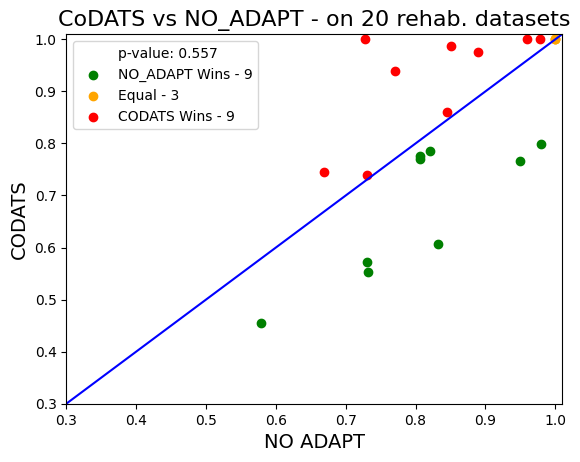

In [70]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test
stat, p_value = wilcoxon(final_df['mean_bal_acc_no_adapt'].tolist(), final_df['mean_bal_acc'])
p_value = np.round(p_value, 3)
print('p_value: ', p_value)

plot_1v1_perf(final_df, 
              p_value, 
              x_y_lim=0.3, 
              acc_base=1.01, 
              co_col='mean_bal_acc', 
              base_col='mean_bal_acc_no_adapt', 
              xlabel='NO ADAPT', 
              ylabel='CODATS', 
              legend_base='NO_ADAPT', 
              legend_co='CODATS', 
              title='CoDATS vs NO_ADAPT - on 20 rehab. datasets', 
              file_name='codats_vs_no-adapt')

In [47]:
import matplotlib.pyplot as plt

p_value:  0.144


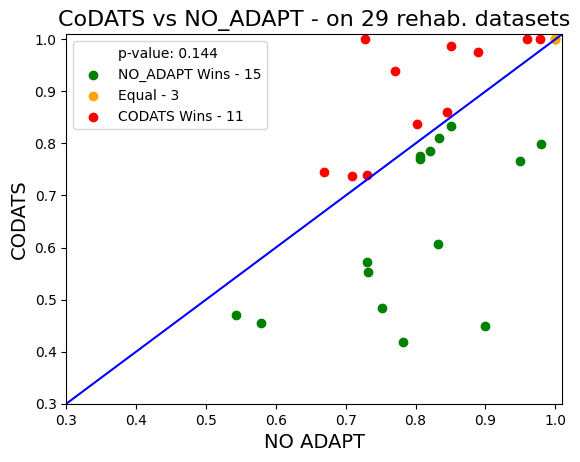

In [105]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test
stat, p_value = wilcoxon(final_df['mean_bal_acc_no_adapt'].tolist(), final_df['mean_bal_acc'])
p_value = np.round(p_value, 3)
print('p_value: ', p_value)

plot_1v1_perf(final_df, 
              p_value, 
              x_y_lim=0.3, 
              acc_base=1.01, 
              co_col='mean_bal_acc', 
              base_col='mean_bal_acc_no_adapt', 
              xlabel='NO ADAPT', 
              ylabel='CODATS', 
              legend_base='NO_ADAPT', 
              legend_co='CODATS', 
              title='CoDATS vs NO_ADAPT - on 29 rehab. datasets', 
              file_name='codats_vs_no-adapt')

In [106]:
final_df['diff'] = final_df['mean_bal_acc_no_adapt'] - final_df['mean_bal_acc']

In [107]:
final_df.sort_values('diff')

,Dataset,mean_acc,mean_bal_acc,mean_f1_score,mean_auroc,mean_acc_no_adapt,mean_bal_acc_no_adapt,mean_f1_score_no_adapt,mean_auroc_no_adapt,diff
6,UIPRMD_clf_bn_DS,1.00000,1.00000,1.00000,1.00000,0.72776,0.72776,0.70586,0.97778,-0.27224
13,UIPRMD_clf_bn_SSIER,0.94000,0.94000,0.93990,0.98400,0.77000,0.77000,0.73252,0.96300,-0.17000
12,UIPRMD_clf_bn_SSE,0.98750,0.98750,0.98746,1.00000,0.85000,0.85138,0.83684,0.99922,-0.13612
10,UIPRMD_clf_bn_SL,0.97500,0.97638,0.97492,0.97624,0.88750,0.88988,0.88698,0.91534,-0.08650
5,KERAAL_clf_bn_RTK,0.76666,0.74572,0.74798,0.75568,0.66668,0.66904,0.66408,0.76826,-0.07668
9,UIPRMD_clf_bn_SASLR,1.00000,1.00000,1.00000,1.00000,0.96000,0.96000,0.95976,1.00000,-0.04000
28,UCDHE_clf_mc_Rowing,0.82818,0.83658,0.83546,0.95482,0.79862,0.80274,0.79880,0.95692,-0.03384
26,UCDHE_clf_bn_Rowing,0.83046,0.73742,0.73760,0.31694,0.83818,0.70926,0.72542,0.34498,-0.02816
11,UIPRMD_clf_bn_SSA,1.00000,1.00000,1.00000,1.00000,0.97500,0.97778,0.97500,1.00000,-0.02222
15,UIPRMD_clf_bn_STS,0.86108,0.86108,0.86092,0.84446,0.84446,0.84446,0.84078,0.87562,-0.01662


In [137]:
import re, csv
from pathlib import Path
from datetime import datetime



dataset_list = [
                'KERAAL_clf_mc_CTK', 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK', 
                'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK',                     
               
                'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
                'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS',                    
                
                'IRDS_clf_bn_EFL', 
                'IRDS_clf_bn_EFR', 
                'IRDS_clf_bn_SAL', 
                'IRDS_clf_bn_SAR',                     
                'IRDS_clf_bn_SFE', 
                'IRDS_clf_bn_SFL', 
                'IRDS_clf_bn_SFR', 
                'IRDS_clf_bn_STL', 
                'IRDS_clf_bn_STR',                
               
                'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing'  
                ]


def parse_stamp(p: Path):
        try:
            return datetime.strptime(p.name, "logs_%m_%d_%Y_%H_%M_%S.log")
        except ValueError:
            return datetime.min  # ignore any non-matching files safely

data_path = '/home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs_CoDATS/fold_0/'
new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
df = pd.DataFrame(columns=new_columns)

for dataset in dataset_list:
    for i in range (5):
        dataset_path = os.path.join(data_path, dataset, "CoDATS", f"run_{i}", "results.csv")
        data_path = os.path.join(data_path, dataset, "CoDATS",  f"run_{i}")
        
        DIR = pathlib.Path(data_path)       # folder with your logs
        PATTERN = "*.log"                # e.g. "run_*.log"
        
        # pick most recent file by modification time
        log_path = max(DIR.glob(PATTERN), key=lambda p: p.stat().st_mtime)
        text = log_path.read_text(encoding="utf-8", errors="ignore")
        
        totals  = re.findall(r"Total_loss\s*:\s*([\d.]+)",  text, flags=re.I)
        domains = re.findall(r"Domain_loss\s*:\s*([\d.]+)", text, flags=re.I)
        srcs    = re.findall(r"Src_cls_loss\s*:\s*([\d.]+)", text, flags=re.I)
        
        n = min(len(totals), len(domains), len(srcs))
        out_csv = log_path.with_suffix(".csv")
        
        with out_csv.open("w", newline="", encoding="utf-8") as f:
            w = csv.writer(f); w.writerow(["total_loss","domain_loss","src_cls_loss"])
            for t,d,s in zip(totals[:n], domains[:n], srcs[:n]):
                w.writerow([float(t), float(d), float(s)])
        
        print(f"Parsed {n} rows from {log_path.name} → {out_csv.name}")
        


Parsed 1500 rows from logs_07_10_2025_09_33_48.log → logs_07_10_2025_09_33_48.csv


ValueError: max() iterable argument is empty

In [135]:
dataset_list = [
                'KERAAL_clf_mc_CTK', 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK', 
                'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK',                     
               
                'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
                'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS',                    
                
                'IRDS_clf_bn_EFL', 
                'IRDS_clf_bn_EFR', 
                'IRDS_clf_bn_SAL', 
                'IRDS_clf_bn_SAR',                     
                'IRDS_clf_bn_SFE', 
                'IRDS_clf_bn_SFL', 
                'IRDS_clf_bn_SFR', 
                'IRDS_clf_bn_STL', 
                'IRDS_clf_bn_STR',                
               
                'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing'  
                ]

base_path = '/home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/'
new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
df = pd.DataFrame(columns=new_columns)

# assume dataset_list is defined elsewhere
for dataset in dataset_list:
    for i in range(5):
        # keep base_path immutable; build per-run paths in new vars
        run_dir = os.path.join(base_path, dataset, "CoDATS", "fold_0", f"run_{i}")
        results_csv_path = os.path.join(run_dir, "results.csv")  # if you need it later

        DIR = pathlib.Path(run_dir)
        PATTERN = "*.log"  # or "logs_*.log" if that’s your naming

        logs = sorted(DIR.glob(PATTERN))
        if not logs:
            print(f"[WARN] No {PATTERN} in {DIR}")
            continue  # or raise

        # pick newest log by mtime
        log_path = max(logs, key=lambda p: p.stat().st_mtime)
        text = log_path.read_text(encoding="utf-8", errors="ignore")

        totals  = re.findall(r"Total_loss\s*:\s*([\d.]+)",  text, flags=re.I)
        domains = re.findall(r"Domain_loss\s*:\s*([\d.]+)", text, flags=re.I)
        srcs    = re.findall(r"Src_cls_loss\s*:\s*([\d.]+)", text, flags=re.I)

        n = min(len(totals), len(domains), len(srcs))
        if n == 0:
            print(f"[WARN] No loss triples found in {log_path.name}")
            continue

        out_csv = log_path.with_suffix(".csv")
        with out_csv.open("w", newline="", encoding="utf-8") as f:
            w = csv.writer(f)
            w.writerow(["total_loss","domain_loss","src_cls_loss"])
            for t, d, s in zip(totals[:n], domains[:n], srcs[:n]):
                w.writerow([float(t), float(d), float(s)])

        print(f"Parsed {n} rows from {log_path.name} → {out_csv.name}")


[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/IRDS_clf_bn_EFL/CoDATS/fold_0/run_0/plots/logs_10_10_2025_20_45_52.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/IRDS_clf_bn_EFL/CoDATS/fold_0/run_1/plots/logs_10_10_2025_20_48_16.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/IRDS_clf_bn_EFL/CoDATS/fold_0/run_2/plots/logs_10_10_2025_20_50_40.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/IRDS_clf_bn_EFL/CoDATS/fold_0/run_3/plots/logs_10_10_2025_20_53_04.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/IRDS_clf_bn_EFL/CoDATS/fold_0/run_4/plots/logs_10_10_2025_20_55_28.png


In [141]:
dataset_list = ['KERAAL_clf_mc_CTK', 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK', 
                'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK',                     
               
                'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
                'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS',                    
                
                'IRDS_clf_bn_EFL', 
                'IRDS_clf_bn_EFR', 
                'IRDS_clf_bn_SAL', 
                'IRDS_clf_bn_SAR',                     
                'IRDS_clf_bn_SFE', 
                'IRDS_clf_bn_SFL', 
                'IRDS_clf_bn_SFR', 
                'IRDS_clf_bn_STL', 
                'IRDS_clf_bn_STR',                
               
                'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing'  
                ]

base_path = '/home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs_CoDATS/fold_0/'

# robust float pattern: 1, 1.2, .3, -0.1, 1e-3, etc.
FP = r'[-+]?(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][-+]?\d+)?'
re_total  = re.compile(rf'Total_loss\s*:\s*({FP})',  re.I)
re_domain = re.compile(rf'Domain_loss\s*:\s*({FP})', re.I)
re_src    = re.compile(rf'Src_cls_loss\s*:\s*({FP})', re.I)

for dataset in dataset_list:
    for i in range(5):
        run_dir = os.path.join(base_path, dataset, "CoDATS", f"run_{i}")
        dpath = pathlib.Path(run_dir)

        if not dpath.exists():
            print(f"[WARN] Missing run dir: {dpath}")
            continue

        # collect ALL logs and make a CSV for each
        logs = sorted(list(dpath.glob("*.log")))
        if not logs:
            print(f"[WARN] No *.log in {dpath}")
            continue
        for log_path in logs:
            text = log_path.read_text(encoding="utf-8", errors="ignore")

            totals  = [float(x) for x in re_total.findall(text)]
            domains = [float(x) for x in re_domain.findall(text)]
            srcs    = [float(x) for x in re_src.findall(text)]

            n = min(len(totals), len(domains), len(srcs))
            if n == 0:
                print(f"[WARN] No loss triples found in {log_path}")
                continue

            out_csv = log_path.with_suffix(".csv")  # same name, .csv next to the log
            with out_csv.open("w", newline="", encoding="utf-8") as f:
                w = csv.writer(f)
                w.writerow(["total_loss", "domain_loss", "src_cls_loss"])
                for t, d, s in zip(totals[:n], domains[:n], srcs[:n]):
                    w.writerow([t, d, s])

            print(f"[OK] {dataset}/run_{i}: {log_path.name} → {out_csv.name} ({n} rows)")


[OK] KERAAL_clf_mc_CTK/run_0: logs_07_10_2025_09_33_48.log → logs_07_10_2025_09_33_48.csv (1500 rows)
[OK] KERAAL_clf_mc_CTK/run_1: logs_07_10_2025_09_44_01.log → logs_07_10_2025_09_44_01.csv (1500 rows)
[OK] KERAAL_clf_mc_CTK/run_2: logs_07_10_2025_09_54_29.log → logs_07_10_2025_09_54_29.csv (1500 rows)
[OK] KERAAL_clf_mc_CTK/run_3: logs_07_10_2025_10_04_48.log → logs_07_10_2025_10_04_48.csv (1500 rows)
[OK] KERAAL_clf_mc_CTK/run_4: logs_07_10_2025_10_14_52.log → logs_07_10_2025_10_14_52.csv (1500 rows)
[OK] KERAAL_clf_mc_ELK/run_0: logs_07_10_2025_10_22_55.log → logs_07_10_2025_10_22_55.csv (1500 rows)
[OK] KERAAL_clf_mc_ELK/run_1: logs_07_10_2025_10_31_48.log → logs_07_10_2025_10_31_48.csv (1500 rows)
[OK] KERAAL_clf_mc_ELK/run_2: logs_07_10_2025_10_39_57.log → logs_07_10_2025_10_39_57.csv (1500 rows)
[OK] KERAAL_clf_mc_ELK/run_3: logs_07_10_2025_10_48_40.log → logs_07_10_2025_10_48_40.csv (1500 rows)
[OK] KERAAL_clf_mc_ELK/run_4: logs_07_10_2025_10_56_45.log → logs_07_10_2025_10_56

In [147]:
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

dataset_list = [
    'KERAAL_clf_mc_CTK', 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK',
    'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK',
    'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
    'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS',
    'IRDS_clf_bn_EFL', 'IRDS_clf_bn_EFR', 'IRDS_clf_bn_SAL', 'IRDS_clf_bn_SAR',
    'IRDS_clf_bn_SFE', 'IRDS_clf_bn_SFL', 'IRDS_clf_bn_SFR', 'IRDS_clf_bn_STL', 'IRDS_clf_bn_STR',
    'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing'
]

base_path = '/home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs_CoDATS/fold_0/'
PATTERN = "logs_*.csv"

# columns we’ll try to plot, in a sensible order; only the ones present will be used
CANDIDATE_COLS = [
         # your DA-friendly naming
    "domain_loss",     # may not exist in NO_ADAPT
    "src_cls_loss",    # may not exist in NO_ADAPT
    "cls_loss",        # common alternative
    "train_loss",      # common alternative
    "val_loss"         # if your CSV logs it too
]

for dataset in dataset_list:
    for i in range(5):
        run_dir = os.path.join(base_path, dataset, "CoDATS", f"run_{i}")
        dpath = pathlib.Path(run_dir)

        if not dpath.exists():
            print(f"[WARN] Missing run dir: {dpath}")
            continue

        csv_files = sorted(dpath.glob(PATTERN))
        if not csv_files:
            print(f"[WARN] No {PATTERN} in {dpath}")
            continue

        plots_dir = dpath / "plots"
        plots_dir.mkdir(parents=True, exist_ok=True)

        for csv_path in csv_files:
            try:
                df_loss = pd.read_csv(csv_path)
            except Exception as e:
                print(f"[SKIP] Failed to read {csv_path}: {e}")
                continue

            # Pick only columns that actually exist
            cols_to_plot = [c for c in CANDIDATE_COLS if c in df_loss.columns]
            if not cols_to_plot:
                print(f"[SKIP] {csv_path.name} has none of {CANDIDATE_COLS}")
                continue

            # Add epoch if missing (1..N)
            if "epoch" not in df_loss.columns:
                df_loss = df_loss.copy()
                df_loss["epoch"] = range(1, len(df_loss) + 1)

            # Plot
            plt.figure(figsize=(10, 5))
            for c in cols_to_plot:
                plt.plot(df_loss["epoch"], df_loss[c], label=c)

            title = f"{dataset} | run_{i} | {csv_path.stem}"
            plt.title(title)
            plt.xlabel("epoch")
            plt.ylabel("loss")
            plt.legend()
            plt.grid(True, alpha=0.3)

            out_png = plots_dir / f"{csv_path.stem}.png"
            plt.tight_layout()
            plt.savefig(out_png, dpi=150)
            plt.close()

            print(f"[OK] Plot saved: {out_png}")


[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs_CoDATS/fold_0/KERAAL_clf_mc_CTK/CoDATS/run_0/plots/logs_07_10_2025_09_33_48.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs_CoDATS/fold_0/KERAAL_clf_mc_CTK/CoDATS/run_1/plots/logs_07_10_2025_09_44_01.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs_CoDATS/fold_0/KERAAL_clf_mc_CTK/CoDATS/run_2/plots/logs_07_10_2025_09_54_29.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs_CoDATS/fold_0/KERAAL_clf_mc_CTK/CoDATS/run_3/plots/logs_07_10_2025_10_04_48.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs_CoDATS/fold_0/KERAAL_clf_mc_CTK/CoDATS/run_4/plots/logs_07_10_2025_10_14_52.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab/experiments_logs_CoDATS/fold_0/KERAAL_clf_mc_ELK/CoDATS/run_0/plots/logs_07_10_2025_10_22_55.png
[OK] Plot saved: /home/jabdullayev/phd/project

In [151]:
dataset_list = [
                'KERAAL_clf_mc_CTK', 'KERAAL_clf_mc_ELK', 'KERAAL_clf_mc_RTK', 
                'KERAAL_clf_bn_CTK', 'KERAAL_clf_bn_ELK', 'KERAAL_clf_bn_RTK',                     
               
                'UIPRMD_clf_bn_DS', 'UIPRMD_clf_bn_HS', 'UIPRMD_clf_bn_IL', 'UIPRMD_clf_bn_SASLR', 'UIPRMD_clf_bn_SL',
                'UIPRMD_clf_bn_SSA', 'UIPRMD_clf_bn_SSE', 'UIPRMD_clf_bn_SSIER', 'UIPRMD_clf_bn_SSS', 'UIPRMD_clf_bn_STS',                    

                'IRDS_clf_bn_EFL',
                'IRDS_clf_bn_EFR', 
                'IRDS_clf_bn_SAL', 
                'IRDS_clf_bn_SAR',                     
                'IRDS_clf_bn_SFE', 
                'IRDS_clf_bn_SFL', 
                'IRDS_clf_bn_SFR', 
                'IRDS_clf_bn_STL', 
                'IRDS_clf_bn_STR',                
               
                'UCDHE_clf_bn_MP', 'UCDHE_clf_bn_Rowing', 'UCDHE_clf_mc_MP', 'UCDHE_clf_mc_Rowing'  
                ]

import os, pathlib, re
import pandas as pd
import matplotlib.pyplot as plt

base_path = '/home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/'
new_columns = ['Dataset', 'mean_acc', 'mean_bal_acc', 'mean_f1_score', 'mean_auroc']
df = pd.DataFrame(columns=new_columns)

# assume dataset_list = [...] is defined earlier
for dataset in dataset_list:
    for i in range(5):
        run_dir = os.path.join(base_path, dataset, "CoDATS", "fold_0", f"run_{i}")
        DIR = pathlib.Path(run_dir)
        PATTERN = "logs_*.csv"   # your naming

        csv_files = sorted(DIR.glob(PATTERN))
        if not csv_files:
            print(f"[WARN] No {PATTERN} in {DIR}")
            continue

        # make a folder for images
        plots_dir = DIR / "plots"
        plots_dir.mkdir(exist_ok=True, parents=True)

        for csv_path in csv_files:
            # read csv
            df_loss = pd.read_csv(csv_path)

            # check expected columns; if not present, skip
            expected = {"domain_loss", "src_cls_loss"}
            if not expected.issubset(set(df_loss.columns)):
                print(f"[SKIP] {csv_path.name} missing expected cols {expected}")
                continue

            # add epoch column if not present (index-based)
            if "epoch" not in df_loss.columns:
                df_loss = df_loss.copy()
                df_loss["epoch"] = range(1, len(df_loss) + 1)

            # --- plotting (one figure per CSV) ---
            plt.figure(figsize=(10, 5))
            plt.plot(df_loss["epoch"], df_loss["domain_loss"], label="domain_loss")
            plt.plot(df_loss["epoch"], df_loss["src_cls_loss"], label="src_cls_loss")

            # title = dataset / run / filename (trim extension)
            title = f"{dataset} | run_{i} | {csv_path.stem}"
            plt.title(title)
            plt.xlabel("epoch")
            plt.ylabel("loss")
            plt.legend()
            plt.grid(True, alpha=0.3)

            # save next to csv, under plots/
            out_png = plots_dir / f"{csv_path.stem}.png"
            plt.tight_layout()
            plt.savefig(out_png, dpi=150)
            plt.close()

            print(f"[OK] Plot saved: {out_png}")

            # if you still want to show just domain_loss quickly:
            # plt.figure(); plt.plot(df_loss['domain_loss']); plt.title(f"{title} (domain_loss)"); ...


[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/KERAAL_clf_mc_CTK/CoDATS/fold_0/run_0/plots/logs_10_10_2025_18_01_50.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/KERAAL_clf_mc_CTK/CoDATS/fold_0/run_1/plots/logs_10_10_2025_18_05_59.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/KERAAL_clf_mc_CTK/CoDATS/fold_0/run_2/plots/logs_10_10_2025_18_10_16.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/KERAAL_clf_mc_CTK/CoDATS/fold_0/run_3/plots/logs_10_10_2025_18_14_45.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/KERAAL_clf_mc_CTK/CoDATS/fold_0/run_4/plots/logs_10_10_2025_18_19_35.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_logs/KERAAL_clf_mc_ELK/CoDATS/fold_0/run_0/plots/logs_10_10_2025_18_24_11.png
[OK] Plot saved: /home/jabdullayev/phd/projects/UDA-DeepRehab-2/experiments_